In [108]:
import numpy as np

In [109]:
import pandas as pd

In [110]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [112]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor




In [113]:
from xgboost import XGBRegressor


In [114]:
df = pd.read_csv("Crop_recommendation.csv")

In [115]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [116]:
df.shape

(2200, 8)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [118]:
df.duplicated().sum()

np.int64(0)

In [119]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [120]:
corr = df.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

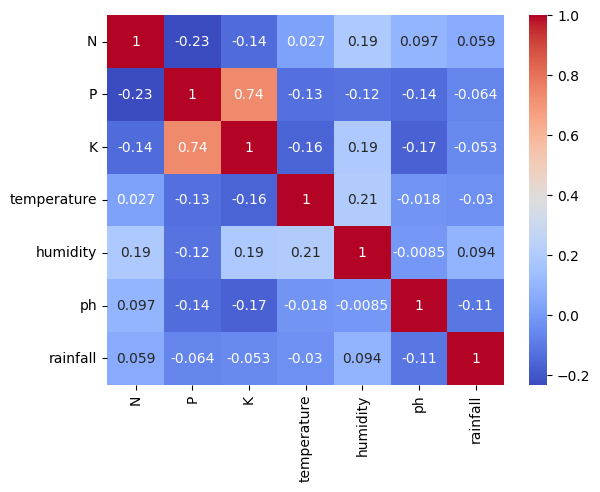

In [121]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

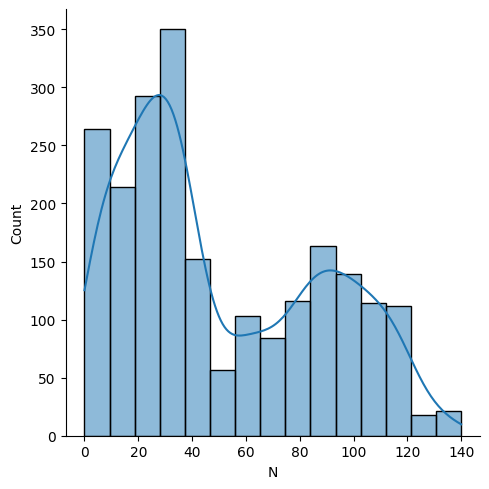

In [122]:
sns.displot(data=df,x='N',kde=True)

<Axes: ylabel='N'>

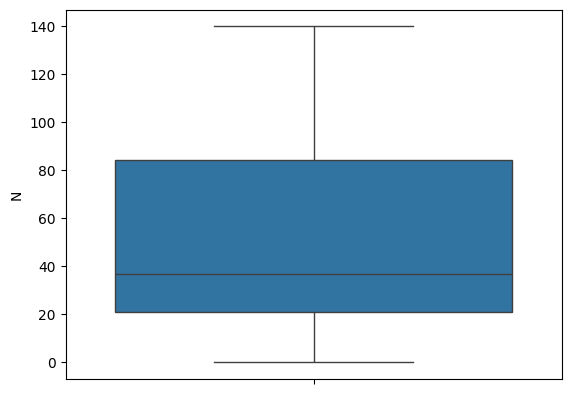

In [123]:
sns.boxplot(df['N'])

<Axes: ylabel='P'>

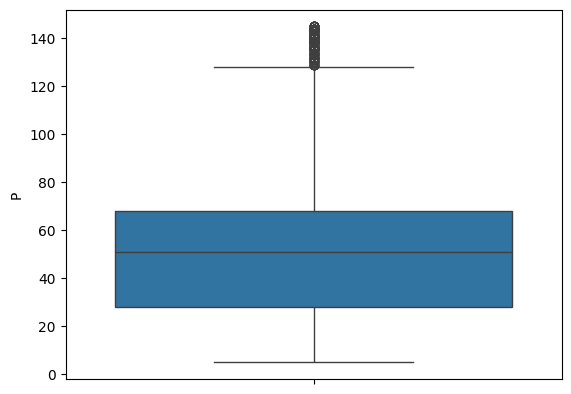

In [124]:
sns.boxplot(df['P'])

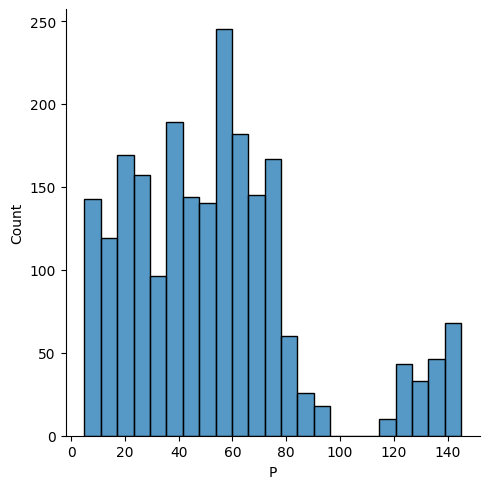

In [125]:
sns.displot(df['P'])

<Axes: ylabel='K'>

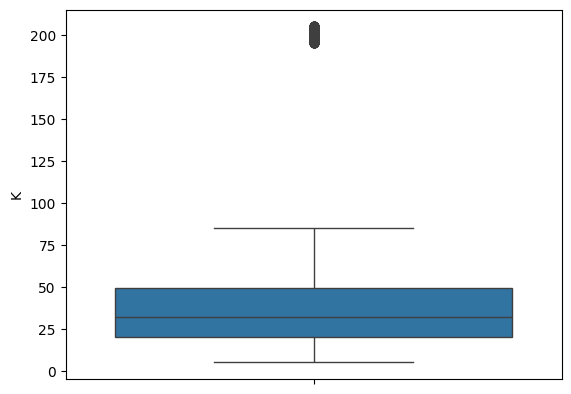

In [126]:
sns.boxplot(df['K'])

In [127]:
df[df["K"]>170]

,N,P,K,temperature,humidity,ph,rainfall,label
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes
...,...,...,...,...,...,...,...,...
1595,40,120,197,23.805938,92.488795,5.889481,119.633555,apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,apple


<Axes: ylabel='temperature'>

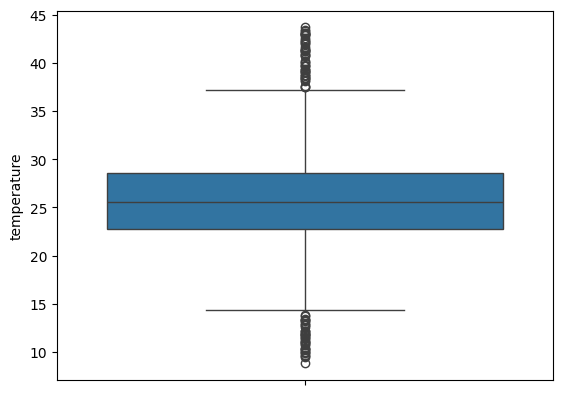

In [128]:
sns.boxplot(df['temperature'])

<Axes: ylabel='humidity'>

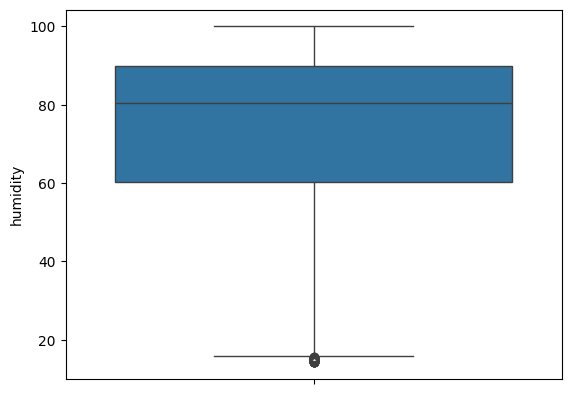

In [129]:
sns.boxplot(df['humidity'])

<Axes: ylabel='ph'>

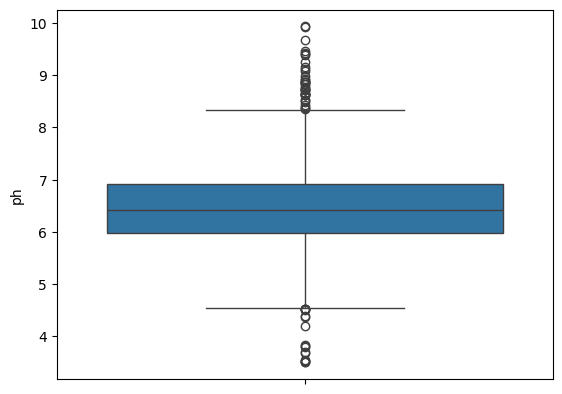

In [130]:
sns.boxplot(df['ph'])

<Axes: ylabel='rainfall'>

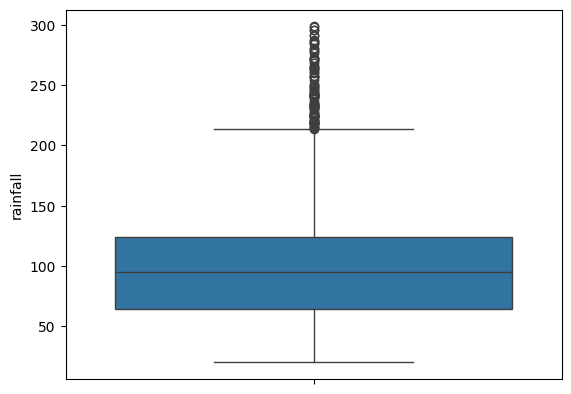

In [131]:
sns.boxplot(df['rainfall'])

In [132]:
df[df["rainfall"]>220]

,N,P,K,temperature,humidity,ph,rainfall,label
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
...,...,...,...,...,...,...,...,...
1859,37,10,32,28.963183,95.163337,6.165085,222.803013,coconut
1865,15,28,32,28.842710,99.643285,6.218572,224.401668,coconut
1881,19,30,30,29.565492,91.408963,5.826381,224.831573,coconut
1892,3,9,35,26.916419,99.846716,6.318553,225.632366,coconut


In [133]:
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [150]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [134]:
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

In [151]:
y.value_counts()

label_encoded
20    100
11    100
3     100
9     100
18    100
13    100
14    100
2     100
10    100
19    100
1     100
12    100
7     100
21    100
15    100
0     100
16    100
17    100
4     100
6     100
8     100
5     100
Name: count, dtype: int64

In [136]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoded, Length: 2200, dtype: int64

In [156]:
y_transformed = np.log1p(y)

In [157]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"])
    ],
    remainder='passthrough'
)

In [158]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output

In [159]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [160]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

C:\Users\uttam\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\uttam\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

In [161]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [162]:
model_df.sort_values(['mae'])

,name,r2,mae
4,decision tree,0.954145,0.372727
6,extra trees,0.989899,0.493242
5,random forest,0.977310,0.516731
10,xgboost,0.962569,0.760558
7,gradient boosting,0.934441,1.408307
1,svr,0.921790,1.559345
9,mlp,0.926391,1.889217
8,adaboost,0.784246,3.442213
2,ridge,0.347964,4.713653
0,linear_reg,0.347959,4.713831


In [163]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor()) 
])    

In [164]:
pipeline.fit(X,y_transformed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['N', 'P', 'K', 'temperature',
                                                   'humidity', 'ph',
                                                   'rainfall'])])),
                ('regressor', DecisionTreeRegressor())])

In [165]:
X.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [190]:
X.iloc[1003].values

array([86.        , 76.        , 54.        , 29.3159075 , 80.11585705,
        5.92682475, 90.10978128])

In [191]:
data = [[ "86"        ,  "76"        ,  "54"        ,  "29.00445915",
        "80.3207629" ,   "5.94020714", "90.9642476" ]]
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
one_df = pd.DataFrame(data, columns=columns)

one_df

,N,P,K,temperature,humidity,ph,rainfall
0,86,76,54,29.00445915,80.3207629,5.94020714,90.9642476


In [192]:
c = np.expm1(pipeline.predict(one_df))
crop_name = label_encoder.inverse_transform([int(c)])
crop_name

C:\Users\uttam\AppData\Local\Temp\ipykernel_18196\3320968853.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  crop_name = label_encoder.inverse_transform([int(c)])


array(['banana'], dtype=object)

C:\Users\uttam\AppData\Local\Temp\ipykernel_18196\2881663316.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  crop_name = label_encoder.inverse_transform([int(c)])


array(['apple'], dtype=object)

In [149]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoded, Length: 2200, dtype: int64

In [181]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [182]:
with open('df.pkl', 'wb') as file:
    pickle.dump(X, file)

In [183]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)